In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h1>Q 1.1</h1>

In [38]:
# Create TC matrix

n = 240
AV = np.array([0,20,0,0,0,0])
IV = np.array([30,45,60,40,40,40])
DO = np.array([15,20,25,15,20,25])

TC = np.array([([0] * AV[i] + (([1] * DO[i] + [0] * (IV[i] - DO[i])) * int(n/IV[i])))[0:240] for i in range(6)], \
              dtype = 'object')

# Standardize

for i in range(6):
    TC[i] = (TC[i] - np.mean(TC[i]))/np.std(TC[i])

TC = TC.astype(float)

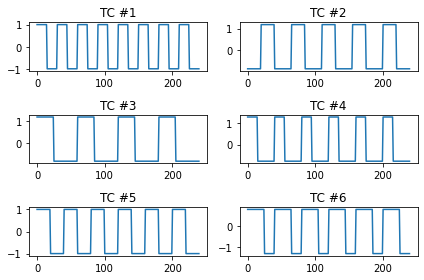

In [111]:
# Plot each TC.

fig, axis = plt.subplots(3, 2)

for i in range(6):
    axis[int(i/2), i%2].plot(range(240), TC[i])
    axis[int(i/2), i%2].set_title("TC #" + str(i + 1))
    
fig.tight_layout()
plt.show()

<h1>Q 1.2</h1>

<AxesSubplot:>

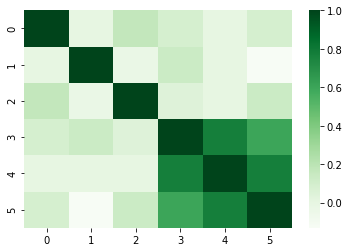

In [114]:
# Visualise correlations.

corr = np.corrcoef(TC)
sns.heatmap(corr, cmap = 'Greens')

<h1>Q 1.3</h1>

In [35]:
# Create new SM

# Create individual matrices

tmp1 = (([0]*21)*21)
for i in range(1, 6):
    for j in range(1, 6):
        tmp1[i*21 + j] = 1

tmp2 = (([0]*21)*21)
for i in range(1, 6):
    for j in range(14, 19):
        tmp2[i*21 + j] = 1
        
tmp3 = (([0]*21)*21)
for i in range(7, 13):
    for j in range(1, 6):
        tmp3[i*21 + j] = 1
        
tmp4 = (([0]*21)*21)
for i in range(7, 13):
    for j in range(15, 20):
        tmp4[i*21 + j] = 1
        
tmp5 = (([0]*21)*21)
for i in range(14, 19):
    for j in range(2, 7):
        tmp5[i*21 + j] = 1
        
tmp6 = (([0]*21)*21)
for i in range(14, 19):
    for j in range(15, 20):
        tmp6[i*21 + j] = 1
        
SM = [tmp1, tmp2, tmp3, tmp4, tmp5, tmp6]

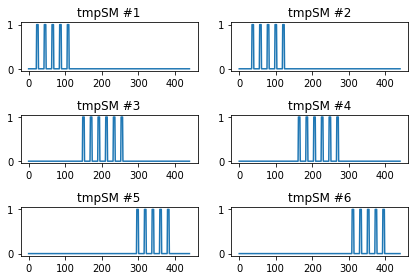

In [36]:
# Plot tmpSMs

fig, axis = plt.subplots(3, 2)

for i in range(6):
    axis[int(i/2), i%2].plot(range(441), SM[i])
    axis[int(i/2), i%2].set_title("tmpSM #" + str(i + 1))
    
fig.tight_layout()
plt.show()

<AxesSubplot:>

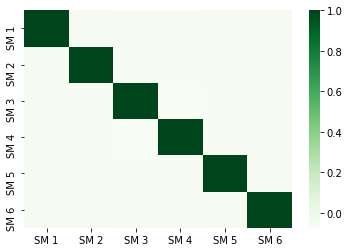

In [41]:
# Plot tmpSMs correlations.

corr = np.corrcoef(SM)
labels = ["SM " + str(i) for i in range(1, 7)]
sns.heatmap(corr, cmap = 'Greens', xticklabels = labels, yticklabels = labels)